In [ ]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load test module for sanity check
from test_utils import test

# Logistic Regression
## Classification Using Linear Regression
Load your data.

In [ ]:
from helpers import sample_data, load_data, standardize

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=200)
x, mean_x, std_x = standardize(X)

Use `least_squares` to compute w, and visualize the results.

In [ ]:
from least_squares import least_squares
from plots import visualization

def least_square_classification_demo(y, x):
    """Least square demo 

    Args:
        y:  shape=(N, 1)
        x:  shape=(N, 2)
    """
    # classify the data by linear regression
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    # ***************************************************
    # INSERT YOUR CODE HERE
    # classify the data by linear regression: 
    # ***************************************************
    w,loss = least_squares(y,tx)

    # visualize your classification.
    visualization(y, x, mean_x, std_x, w, "classification_by_least_square")
    
least_square_classification_demo(y, x)

#### The `least_square_classification_demo` is expected to show

![1](./classification_by_least_square.png)

## Logistic Regression

Compute your cost by negative log likelihood.

In [ ]:
def sigmoid(t):
    """apply sigmoid function on t.

    Args:
        t: scalar or numpy array

    Returns:
        scalar or numpy array

    >>> sigmoid(np.array([0.1]))
    array([0.52497919])
    >>> sigmoid(np.array([0.1, 0.1]))
    array([0.52497919, 0.52497919])
    """
    return 1/(1+np.exp(-t))

test(sigmoid)

In [ ]:
def calculate_loss(y, tx, w):
    """compute the cost by negative log likelihood.

    Args:
        y:  shape=(N, 1)
        tx: shape=(N, D)
        w:  shape=(D, 1) 

    Returns:
        a non-negative loss

    >>> y = np.c_[[0., 1.]]
    >>> tx = np.arange(4).reshape(2, 2)
    >>> w = np.c_[[2., 3.]]
    >>> round(calculate_loss(y, tx, w), 8)
    1.52429481
    """
    assert y.shape[0] == tx.shape[0]
    assert tx.shape[1] == w.shape[0]

    # ***************************************************
    N = y.shape[0]
    tx_w = tx.dot(w)
    return 1/N * np.sum(np.log(1 + np.exp(tx_w))- y * tx_w)
    # ***************************************************

test(calculate_loss)

In [133]:
def calculate_gradient(y, tx, w, stochastic = False):
    """compute the gradient of loss.
    
    Args:
        y:  shape=(N, 1)
        tx: shape=(N, D)
        w:  shape=(D, 1)
        stochastic : True if we use sgd 

    Returns:
        a vector of shape (D, 1)

    >>> np.set_printoptions(8)
    >>> y = np.c_[[0., 1.]]
    >>> tx = np.arange(6).reshape(2, 3)
    >>> w = np.array([[0.1], [0.2], [0.3]])
    >>> calculate_gradient(y, tx, w)
    array([[-0.10370763],
           [ 0.2067104 ],
           [ 0.51712843]])
    """
    # ***************************************************
    N = y.shape[0]
    if stochastic :
        idx = random.randint(0, N-1)
        return np.array([tx[idx]]).T * (sigmoid(tx[idx].dot(w))-y[idx])
    else :
        return 1/N * tx.T.dot(sigmoid(tx.dot(w))-y)
    # ***************************************************

test(calculate_gradient)

✅ Your `calculate_gradient` passed 5 tests.


### Using Gradient Descent
Implement your function to calculate the gradient for logistic regression.

In [135]:
def learning_by_gradient_descent(y, tx, w, gamma, stochastic=False):
    """
    Do one step of gradient descent using logistic regression. Return the loss and the updated w.

    Args:
        y:  shape=(N, 1)
        tx: shape=(N, D)
        w:  shape=(D, 1) 
        gamma: float
        stochastic : True if we use sgd


    Returns:
        loss: scalar number
        w: shape=(D, 1) 

    >>> y = np.c_[[0., 1.]]
    >>> tx = np.arange(6).reshape(2, 3)
    >>> w = np.array([[0.1], [0.2], [0.3]])
    >>> gamma = 0.1
    >>> loss, w = learning_by_gradient_descent(y, tx, w, gamma)
    >>> round(loss, 8)
    0.62137268
    >>> w
    array([[0.11037076],
           [0.17932896],
           [0.24828716]])
    """
    # ***************************************************
    loss = calculate_loss(y, tx, w)
    w = w - gamma * calculate_gradient(y, tx, w, stochastic)
    return loss,w
    # ***************************************************


test(learning_by_gradient_descent)

✅ Your `learning_by_gradient_descent` passed 7 tests.


Demo!

In [ ]:
from helpers import de_standardize

def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    threshold = 1e-8
    gamma = 0.5
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_gradient_descent", True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))
    print(loss, w)

logistic_regression_gradient_descent_demo(y, x)

In [136]:
import random
def logistic_regression(y, tx, initial_w, max_iter, gamma, threshold = 1e-8, stochastic = False):
    """
    Do one step of gradient descent using logistic regression. Return the loss and the updated w.

    Args:
        y:  shape=(N, 1) with values in {-1,1}
        tx: shape=(N, D)
        w:  shape=(D, 1) 
        gamma: float

    Returns:
        loss: scalar number
        w: shape=(D, 1) 
    """
    # change y so that it is in {0,1}
    y = y/2+0.5
    w = initial_w
    losses = []
    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma, stochastic)
        losses.append(loss)
        # check if we have to stop
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    return loss, w

y2 = (y-0.5)*2
tx = np.c_[np.ones((y.shape[0], 1)), x]
initial_w = np.zeros((tx.shape[1], 1))
logistic_regression(y2, tx, initial_w, 10000, 0.5 ,threshold = 1e-8, stochastic = True)

(0.2290170594730636,
 array([[-0.88130882],
        [ 2.48967472],
        [-5.45258201]]))

#### The `logistic_regression_gradient_descent_demo` is expected to show

![1](../template/classification_by_logistic_regression_gradient_descent.png)

Calculate your hessian below

In [ ]:
def calculate_hessian(y, tx, w):
    """return the Hessian of the loss function.

    Args:
        y:  shape=(N, 1)
        tx: shape=(N, D)
        w:  shape=(D, 1) 

    Returns:
        a hessian matrix of shape=(D, D) 

    >>> y = np.c_[[0., 1.]]
    >>> tx = np.arange(6).reshape(2, 3)
    >>> w = np.array([[0.1], [0.2], [0.3]])
    >>> calculate_hessian(y, tx, w)
    array([[0.28961235, 0.3861498 , 0.48268724],
           [0.3861498 , 0.62182124, 0.85749269],
           [0.48268724, 0.85749269, 1.23229813]])
    """
    # ***************************************************
    N = y.shape[0]
    s_tx_w = sigmoid(tx.dot(w))
    S = s_tx_w*(1-s_tx_w) * np.eye(N)
    return 1/N * tx.T.dot(S).dot(tx)
    # ***************************************************

test(calculate_hessian)

Write a function below to return loss, gradient, and hessian.

In [ ]:
def logistic_regression(y, tx, w):
    """return the loss, gradient of the loss, and hessian of the loss.

    Args:
        y:  shape=(N, 1)
        tx: shape=(N, D)
        w:  shape=(D, 1) 

    Returns:
        loss: scalar number
        gradient: shape=(D, 1) 
        hessian: shape=(D, D)

    >>> y = np.c_[[0., 1.]]
    >>> tx = np.arange(6).reshape(2, 3)
    >>> w = np.array([[0.1], [0.2], [0.3]])
    >>> loss, gradient, hessian = logistic_regression(y, tx, w)
    >>> round(loss, 8)
    0.62137268
    >>> gradient, hessian
    (array([[-0.10370763],
           [ 0.2067104 ],
           [ 0.51712843]]), array([[0.28961235, 0.3861498 , 0.48268724],
           [0.3861498 , 0.62182124, 0.85749269],
           [0.48268724, 0.85749269, 1.23229813]]))
    """
    # ***************************************************
    loss = calculate_loss(y, tx, w)
    gradient = calculate_gradient(y, tx, w)
    hess = calculate_hessian(y, tx, w)
    return loss, gradient, hess
    # ***************************************************

test(logistic_regression)

### Using Newton's method
Use Newton's method for logistic regression.

In [ ]:
def learning_by_newton_method(y, tx, w, gamma):
    """
    Do one step of Newton's method.
    Return the loss and updated w.

    Args:
        y:  shape=(N, 1)
        tx: shape=(N, D)
        w:  shape=(D, 1)
        gamma: scalar

    Returns:
        loss: scalar number
        w: shape=(D, 1)

    >>> y = np.c_[[0., 1.]]
    >>> tx = np.arange(6).reshape(2, 3)
    >>> w = np.array([[0.1], [0.2], [0.3]])
    >>> gamma = 0.1
    >>> loss, w = learning_by_newton_method(y, tx, w, gamma)
    >>> round(loss, 8)
    0.62137268
    >>> w
    array([[ 0.25152211],
           [ 0.50616418],
           [-0.01435914]])
    """
    # ***************************************************
    loss, gradient, hess = logistic_regression(y, tx, w)
    w = np.linalg.solve(hess, hess.dot(w) - gamma * gradient)
    # ***************************************************
    return loss, w

test(learning_by_newton_method)

demo

In [ ]:
def logistic_regression_newton_method_demo(y, x):
    # init parameters
    max_iter = 100
    threshold = 1e-8
    lambda_ = 0.1
    gamma = 1.
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_newton_method(y, tx, w, gamma)
        # log info
        if iter % 1 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))

        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_newton_method", True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_newton_method_demo(y, x)

#### The `logistic_regression_newton_method_demo` is expected to show

![1](../template/classification_by_logistic_regression_newton_method.png)

### Using penalized logistic regression
Fill in the function below.

In [ ]:
def penalized_logistic_regression(y, tx, w, lambda_, stochastic):
    """return the loss and gradient.

    Args:
        y:  shape=(N, 1)
        tx: shape=(N, D)
        w:  shape=(D, 1)
        lambda_: scalar

    Returns:
        loss: scalar number
        gradient: shape=(D, 1)

    >>> y = np.c_[[0., 1.]]
    >>> tx = np.arange(6).reshape(2, 3)
    >>> w = np.array([[0.1], [0.2], [0.3]])
    >>> lambda_ = 0.1
    >>> loss, gradient = penalized_logistic_regression(y, tx, w, lambda_)
    >>> round(loss, 8)
    0.63537268
    >>> gradient 
    array([[-0.08370763],
           [ 0.2467104 ],
           [ 0.57712843]])
    """
    # **************************************************
    loss = calculate_loss(y, tx, w)  +  lambda_ * w.T.dot(w)[0][0]
    gradient = calculate_gradient(y, tx, w) + 2*lambda_*w
    return loss, gradient
    # ***************************************************

test(penalized_logistic_regression)

In [ ]:
def learning_by_penalized_gradient(y, tx, w, gamma, lambda_):
    """
    Do one step of gradient descent, using the penalized logistic regression.
    Return the loss and updated w.

    Args:
        y:  shape=(N, 1)
        tx: shape=(N, D)
        w:  shape=(D, 1)
        gamma: scalar
        lambda_: scalar

    Returns:
        loss: scalar number
        w: shape=(D, 1)

    >>> np.set_printoptions(8)
    >>> y = np.c_[[0., 1.]]
    >>> tx = np.arange(6).reshape(2, 3)
    >>> w = np.array([[0.1], [0.2], [0.3]])
    >>> lambda_ = 0.1
    >>> gamma = 0.1
    >>> loss, w = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
    >>> round(loss, 8)
    0.63537268
    >>> w
    array([[0.10837076],
           [0.17532896],
           [0.24228716]])
    """
    loss, gradient = penalized_logistic_regression(y, tx, w, lambda_)
    w = w - gamma * gradient
    return loss,w

test(learning_by_penalized_gradient)

Current iteration=0, loss=0.6931471805599452
Current iteration=100, loss=0.3393830592266465
Current iteration=200, loss=0.3280462542060041
Current iteration=300, loss=0.32447955700574815
Current iteration=400, loss=0.32272037666838743
Current iteration=500, loss=0.3217694921032908
Current iteration=600, loss=0.3212459232814974
Current iteration=700, loss=0.3209563395667074
Current iteration=800, loss=0.32079590536631125
Current iteration=900, loss=0.32070693742332934
Current iteration=1000, loss=0.3206575675524872
Current iteration=1100, loss=0.3206301576102323
Current iteration=1200, loss=0.3206149339853786
Current iteration=1300, loss=0.320606476306898
Current iteration=1400, loss=0.32060177653665484
Current iteration=1500, loss=0.3205991645483522
Current iteration=1600, loss=0.32059771271245063
loss=0.2728037888826974
[[ 0.06290811]
 [-0.40801698]
 [-2.14684507]]


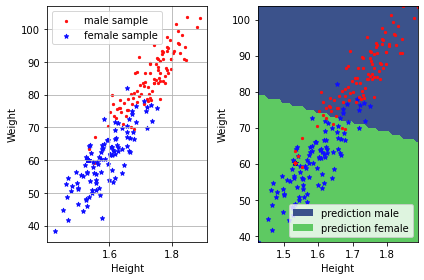

In [139]:
def logistic_regression_penalized_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    gamma = 0.1
    lambda_ = 0.01
    threshold = 1e-8
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_penalized_gradient_descent", True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))
    print(w)
    
logistic_regression_penalized_gradient_descent_demo(y, x)

In [142]:
def reg_logistic_regression(y, tx, lambda_ ,initial_w, max_iter, gamma, threshold = 1e-8, stochastic = False):
    # change y so that it is in {0,1}
    y = y/2+0.5
    w = initial_w
    losses = []
    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
        losses.append(loss)
        # check if we have to stop
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    loss = calculate_loss(y,tx,w)
    return loss, w
y2 = (y-0.5)*2
tx = np.c_[np.ones((y.shape[0], 1)), x]
initial_w = np.zeros((tx.shape[1], 1))
reg_logistic_regression(y2, tx, 0.01, initial_w, 10000, 0.1 ,threshold = 1e-8, stochastic = False)

(0.2728037888826974,
 array([[ 0.06290811],
        [-0.40801698],
        [-2.14684507]]))

#### The `logistic_regression_penalized_gradient_descent_demo` is expected to show

![1](../template/classification_by_logistic_regression_penalized_gradient_descent.png)